Importing Libraries 

In [8]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cros_val_score
import pickle

Read Dataset 

In [9]:
news_df=pd.read_csv('train.csv')

In [10]:
news_df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [11]:
news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
news_df.shape

(20800, 5)

In [13]:
print(news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


Preprocessing

In [14]:
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
news_df=news_df.fillna('')

In [16]:
news_df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [17]:
news_df['content'] = news_df['author']+' '+news_df['title']

In [18]:
news_df

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


Visualization

Distribution of News Labels with help of pie diagram

In [19]:
label_counts = news_df['label'].value_counts()

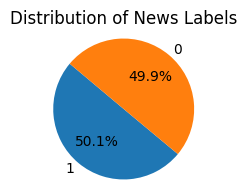

In [20]:
plt.figure(figsize=(2, 2))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of News Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

graph of fake and real news article

label
0    10387
1    10413
Name: content, dtype: int64


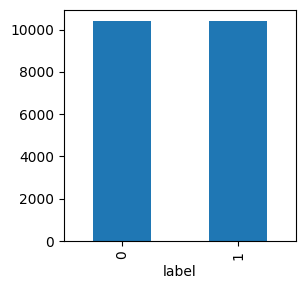

In [21]:
print(news_df.groupby(['label'])['content'].count())
plt.figure(figsize=(3, 3))
news_df.groupby(['label'])['content'].count().plot(kind="bar")
plt.show()

Word Cloud

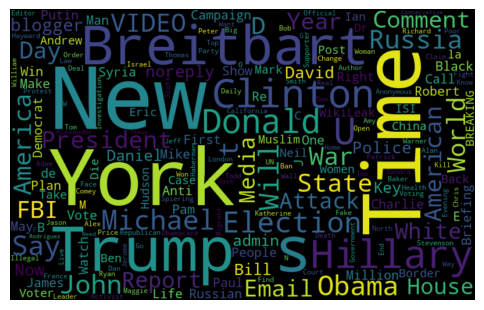

In [22]:
all_words = ' '.join([text for text in news_df.content])

wordcloud = WordCloud(width= 800, height= 500,max_font_size = 150,collocations = False).generate(all_words)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Separating Data and Label

In [23]:
X = news_df.drop('label',axis=1)
y = news_df['label']

In [24]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:
Reducing word to its root word

In [25]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [26]:
news_df['content'] = news_df['content'].apply(stemming)

In [27]:
news_df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

Separating Data and Label

In [28]:
X = news_df['content'].values
y = news_df['label'].values

Vectorization:
Converting data in text form to numeric form

In [29]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [30]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

splitting data into training and test data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [32]:
X_train.shape

(16640, 17128)

Training the model:LogisticRegression

In [78]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [91]:
# on training set
train_y_pred = model.predict(X_train)
print(accuracy_score(train_y_pred,Y_train))

0.9863581730769231


In [75]:
print("Classification Report for Train Data")
print(classification_report(train_y_model, Y_train))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8181
           1       0.99      0.98      0.99      8459

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



In [80]:
# on testing set
testing_y_model = model.predict(X_test)
print(accuracy_score(testing_y_model,Y_test))

0.9790865384615385


In [81]:
print("Classification Report for Test Data")
print(classification_report(testing_y_model, Y_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2018
           1       0.99      0.97      0.98      2142

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



[[2004   14]
 [  73 2069]]


<Axes: >

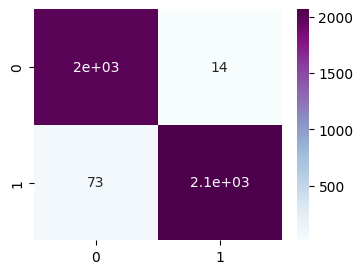

In [82]:
cm= confusion_matrix(testing_y_model,Y_test)  
print(cm)
plt.figure(figsize=(4,3))
sns.heatmap(cm,cmap="BuPu",annot=True)

In [83]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [85]:
# on training set
train_y_rf = rf.predict(X_train)
print(accuracy_score(train_y_rf,Y_train))

1.0


In [86]:
print("Classification Report for Train Data")
print(classification_report(train_y_rf, Y_train))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8310
           1       1.00      1.00      1.00      8330

    accuracy                           1.00     16640
   macro avg       1.00      1.00      1.00     16640
weighted avg       1.00      1.00      1.00     16640



In [87]:
# on testing data
testing_y_rf = rf.predict(X_test)
print(accuracy_score(testing_y_rf,Y_test))

0.9923076923076923


In [88]:
print("Classification Report for Test Data")
print(classification_report(testing_y_rf, Y_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2065
           1       1.00      0.99      0.99      2095

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



[[2055   10]
 [  22 2073]]


<Axes: >

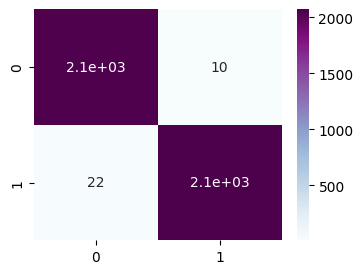

In [92]:
cm= confusion_matrix(testing_y_rf,Y_test)  
print(cm)
plt.figure(figsize=(4,3))
sns.heatmap(cm,cmap="BuPu",annot=True)

In [93]:
lr_accuracy = accuracy_score(testing_y_model, Y_test)
rf_accuracy = accuracy_score(testing_y_rf, Y_test)

In [94]:
labels = ['Logistic Regression', 'Random Forest']
accuracies = [lr_accuracy, rf_accuracy]

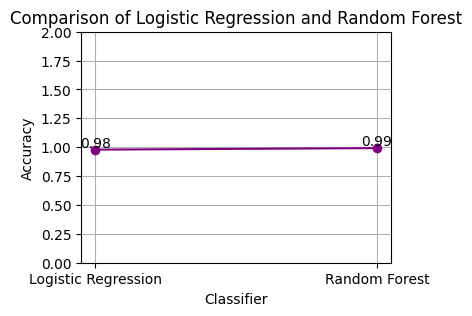

In [103]:
plt.figure(figsize=(4, 3))
plt.plot(labels, accuracies, marker='o', color='purple')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression and Random Forest')
plt.grid(True)
plt.ylim(0.0, 2.0)
for i, v in enumerate(accuracies):
    plt.text(labels[i], v + 0.02, str(round(v, 2)), ha='center')

plt.show()

Detection Model

In [45]:
input_data = X_test[21]
prediction = model.predict(input_data)

In [46]:
if prediction[0] == 0:
    print('The News Is Real')
else:
    print('The News is Fake')

The News is Fake


In [47]:
news_df['content'][78]

'mark landler u diplomat urg strike assad syria new york time'

In [48]:
filename='finalized_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [49]:
filename='vectorizer.pkl'
pickle.dump(vector,open(filename,'wb'))